In [44]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater

In [2]:
#/data/sallen/results/MEOPAR/averages  
#then longhind.201905 for 2007-2012 and then hindcast.201905 for 2013-2019.

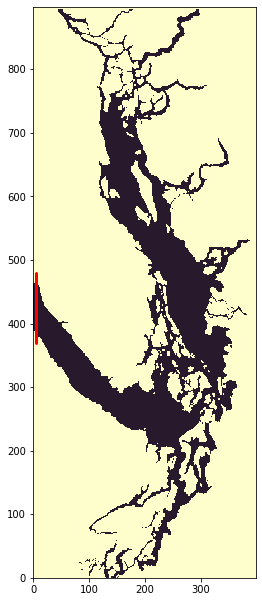

In [3]:
fact = 0.7
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
for i in range(370,480):
    pts = ax1.scatter(5,i,s=3,c='red', marker='o')

In [33]:
storage_bcs_carbon = np.zeros([13,12,40])
storage_bcs_T= np.zeros([13,12,40])
storage_bcs_S= np.zeros([13,12,40])
w = nc.Dataset('/data/sallen/results/MEOPAR/averages/longhind.201905/SalishSea_1m_201212_201212_carp_T.nc')
bound = w['dissolved_inorganic_carbon'][0,:,370:500,5]
bound[bound == 0] = np.nan
boundprof = np.nanmean(bound,axis = 1)
print(np.shape(boundprof))
yrs = np.arange(2007,2020,1)

for i in range(0,13):
    yr = yrs[i]
    print(yr)
    if yr < 2013:
        tdir = '/data/sallen/results/MEOPAR/averages/longhind.201905/'
    else:
        tdir = '/data/sallen/results/MEOPAR/averages/hindcast.201905/'
    for m in range(1,13):
        tm = m
        if m < 10:
            tm = f'0{str(m)}'
        yrstr = f'{yr}{tm}'
        #print(yrstr)
        tnc_C = nc.Dataset(f'{tdir}SalishSea_1m_{yrstr}_{yrstr}_carp_T.nc')
        bound = tnc_C['dissolved_inorganic_carbon'][0,:,370:500,5]
        bound[bound == 0] = np.nan
        boundprof = np.nanmean(bound,axis = 1)
        storage_bcs_carbon[i,m-1,:] = boundprof
        
        tnc_C = nc.Dataset(f'{tdir}SalishSea_1m_{yrstr}_{yrstr}_grid_T.nc')
        bound = tnc_C['vosaline'][0,:,370:500,5]
        bound[bound == 0] = np.nan
        boundprof = np.nanmean(bound,axis = 1)
        storage_bcs_S[i,m-1,:] = boundprof

        tnc_C = nc.Dataset(f'{tdir}SalishSea_1m_{yrstr}_{yrstr}_grid_T.nc')
        bound = tnc_C['votemper'][0,:,370:500,5]
        bound[bound == 0] = np.nan
        boundprof = np.nanmean(bound,axis = 1)
        storage_bcs_T[i,m-1,:] = boundprof

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


(40,)
2007


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice


2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [34]:
import pickle

pickle.dump(storage_bcs_carbon, open("storage_bcs_carbon.pkl", 'wb'))
pickle.dump(storage_bcs_T, open("storage_bcs_T.pkl", 'wb'))
pickle.dump(storage_bcs_S, open("storage_bcs_S.pkl", 'wb'))

grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
print(depths)


storage_bcs_carbon = pickle.load(open('./storage_bcs_carbon.pkl', 'rb'))  
storage_bcs_T = pickle.load(open('./storage_bcs_T.pkl', 'rb')) 
storage_bcs_S = pickle.load(open('./storage_bcs_S.pkl', 'rb')) 

print(np.shape(storage_bcs_T))
depar = np.zeros_like(storage_bcs_T)

for i in range(0,40):
    depar[:,:,i] = depths[i]
    
# print(depar[0:2,0:2,5])

[  0.50000027   1.50000314   2.5000115    3.50003055   4.50007042
   5.50015083   6.50031022   7.50062342   8.50123623   9.50243254
  10.5047653   11.50931127  12.51816684  13.53541212  14.56898216
  15.63428737  16.76117342  18.00713456  19.48178514  21.38997868
  24.10025665  28.22991514  34.68575798  44.51772486  58.48433368
  76.58558445  98.06295924 121.8665184  147.08945807 173.11448217
 199.57304923 226.26030574 253.06663733 279.93454976 306.83419736
 333.75016973 360.6745318  387.60320347 414.53408835 441.46610968]
(13, 12, 40)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Model avg hindcast DIC at y = 370:500 x = 5')

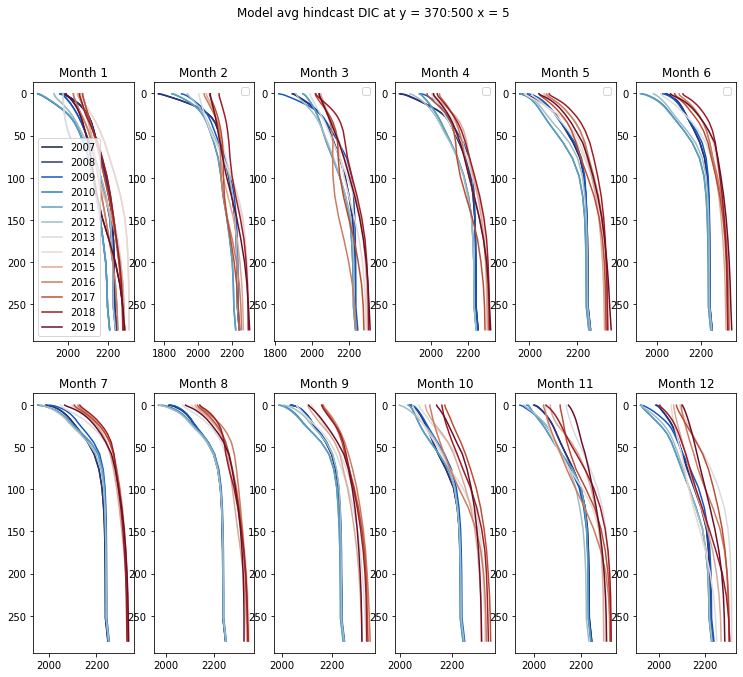

In [35]:
# color = cmap(i/len(cl3_u))) 
fact = 0.7
cmap = cm.cm.balance


fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18*fact, 15*fact))

for i in range(0,6):
    ax = axes[0,i]
    for y in range(0,13):
        ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/13))
    if i ==0:
        for y in range(0,13):
            ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/13), label = f'{y+2007}')
    ax.invert_yaxis()
    ax.legend()
    ax.set_title(f'Month {i+1}')
for i in range(6,12):
    ax = axes[1,i-6]
    for y in range(0,13):
        ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/13))
    ax.set_title(f'Month {i+1}')
    ax.invert_yaxis()

plt.suptitle('Model avg hindcast DIC at y = 370:500 x = 5')

In [36]:
import seawater
print(storage_bcs_S[0,0,:])
dens = seawater.dens(storage_bcs_S,storage_bcs_T,depar)
print(dens[0,0,:])
dic_conv=storage_bcs_carbon*dens/1000

print(dic_conv[0,0,:])
print(storage_bcs_carbon[0,0,:])

[30.1856041  30.37124252 30.48193359 30.58465385 30.68710709 30.78621483
 30.88142014 30.97323036 31.05963326 31.14040947 31.21550941 31.2927494
 31.36569786 31.43624115 31.50184441 31.56433105 31.62790298 31.6958847
 31.77701759 31.8656311  31.9812355  32.13036728 32.30256271 32.4909935
 32.70642853 32.98743057 33.32443237 33.61042404 33.82292938 33.90895462
 33.9578743  33.98011017 33.99983978 34.15230179         nan         nan
         nan         nan         nan         nan]
[1023.60992664 1023.74712798 1023.83157867 1023.9101696  1023.98881412
 1024.06535781 1024.13939773 1024.21122492 1024.27913731 1024.34298393
 1024.40220303 1024.46313276 1024.52100929 1024.57719    1024.62958045
 1024.67958796 1024.73017592 1024.78448818 1024.84938944 1024.9206897
 1025.01401978 1025.1368428  1025.28509351 1025.45981387 1025.67791062
 1025.97043142 1026.33433819 1026.68872413 1027.00145038 1027.20475619
 1027.37478829 1027.51865178 1027.65916295 1027.90636654           nan
           nan     

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Model avg hindcast DIC (2007-2019) at y = 370:500 x = 5 \n (DIC converted to umol/L from umol/kg for years 2007-2012 shown in dotted line)')

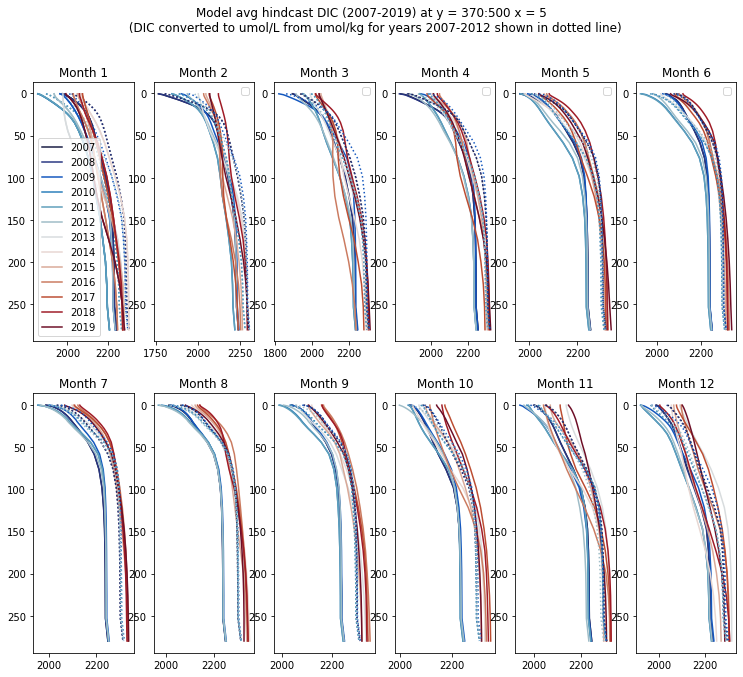

In [41]:
# color = cmap(i/len(cl3_u))) 
fact = 0.7
cmap = cm.cm.balance


fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18*fact, 15*fact))

for i in range(0,6):
    ax = axes[0,i]
    for y in range(0,13):
        ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/13))
    for y in range(0,6):
        ax.plot(dic_conv[y,i,:],depths, color = cmap(y/13), linestyle = ':')
    if i ==0:
        for y in range(0,13):
            ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/13), label = f'{y+2007}')
    ax.invert_yaxis()
    ax.legend()
    ax.set_title(f'Month {i+1}')
for i in range(6,12):
    ax = axes[1,i-6]
    for y in range(0,13):
        ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/13))
    for y in range(0,6):
        ax.plot(dic_conv[y,i,:],depths, color = cmap(y/13), linestyle = ':')

    ax.set_title(f'Month {i+1}')
    ax.invert_yaxis()

plt.suptitle('Model avg hindcast DIC (2007-2019) at y = 370:500 x = 5 \n (DIC converted to umol/L from umol/kg for years 2007-2012 shown in dotted line)')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Model avg hindcast DIC (2007-2012) at y = 370:500 x = 5 \n (DIC converted to umol/L from umol/kg for years 2007-2012 shown in dotted line)')

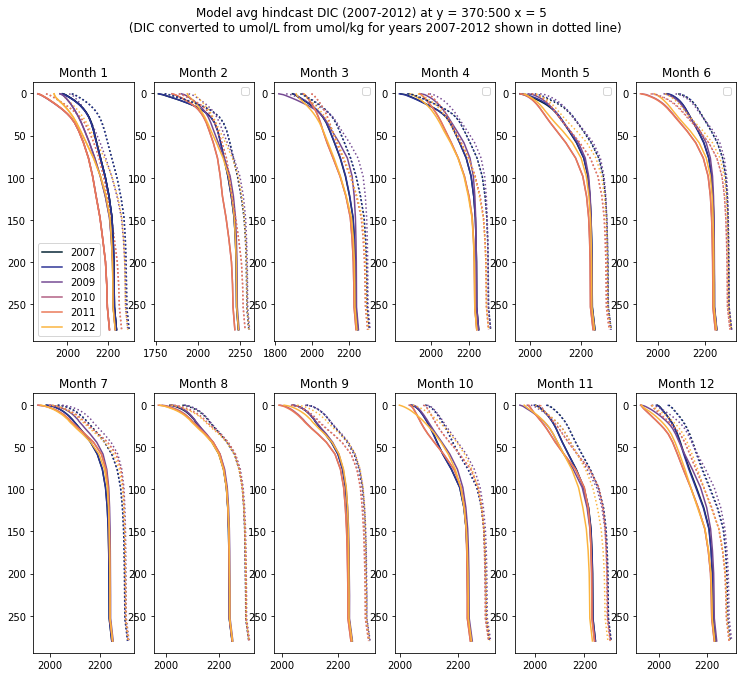

In [43]:
# color = cmap(i/len(cl3_u))) 
fact = 0.7
cmap = cm.cm.thermal


fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18*fact, 15*fact))

for i in range(0,6):
    ax = axes[0,i]
    for y in range(0,6):
        ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/6))
    for y in range(0,6):
        ax.plot(dic_conv[y,i,:],depths, color = cmap(y/6), linestyle = ':')
    if i ==0:
        for y in range(0,6):
            ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/6), label = f'{y+2007}')
    ax.invert_yaxis()
    ax.legend()
    ax.set_title(f'Month {i+1}')
for i in range(6,12):
    ax = axes[1,i-6]
    for y in range(0,6):
        ax.plot(storage_bcs_carbon[y,i,:],depths, color = cmap(y/6))
    for y in range(0,6):
        ax.plot(dic_conv[y,i,:],depths, color = cmap(y/6), linestyle = ':')

    ax.set_title(f'Month {i+1}')
    ax.invert_yaxis()

plt.suptitle('Model avg hindcast DIC (2007-2012) at y = 370:500 x = 5 \n (DIC converted to umol/L from umol/kg for years 2007-2012 shown in dotted line)')